# Tests d'Hypothèse

In [744]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [745]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# I. Etude Univarie
# Test binomial - var discrète
-  **Évaluer si le nombre de succès (ou échecs) dans une série d'éssais binaires suit une distribution théorique.**
## Exemple d'application de la fonction binomtest - Lancer d'une pièce

In [746]:
from scipy.stats import binomtest

n = 40
k = 28
p0 = 0.5 # --> H0

# On fixe la tolérance à alpha
alpha = 0.05

# Test binomial bilatéral
p_value = binomtest(k=k, n=n, p=p0)
p_value.pvalue

if p_value.pvalue < alpha:
    print(f"La probabilité d'observer 28 piles (ou plus) sous l'hypothèse H0 est très " 
          f"fiable {p_value.pvalue.round(2)}% -> On rejet H0, \nla pièce est probablement biaisée!")
else:
    print("Nous avons suffisament d'évidences pour rejeter H0")

La probabilité d'observer 28 piles (ou plus) sous l'hypothèse H0 est très fiable 0.02% -> On rejet H0, 
la pièce est probablement biaisée!


# Test Chisquare -> Var discrète
- **Compare les fréquences observées à des féquences attendues dans plusieurs catégories (>binaires)**

H0 : "Les clients donnent les pourboires : 20% le jeudi, 10% le vendredi, 40% le samedi, 30% le dimanche"

In [747]:
# Théorie
expected_frequencies = np.array([0.2, 0.1, 0.4, 0.3])
expected_frequencies = expected_frequencies * len(df)

# fixer le seuil de télérance alpha
alpha = 0.02

# Expérience
observed_freqiencies = df['day'].value_counts(normalize=False, sort=False).round(2)

# Calcul p_value
from scipy.stats import chisquare
p_value = chisquare(f_obs=observed_freqiencies, f_exp=expected_frequencies).pvalue.round(2)

# Comparaison
if p_value < alpha:
    print(f"Nous avons suffisament d'évidence pour rejeter H0, p_value {p_value} est inférieur à alpha {alpha}!")
else:
    print(f"Nous n'avons pas suffisament d'évidences pour rejeter H0, p_value {p_value} est supérieur à alpha {alpha}!")

Nous n'avons pas suffisament d'évidences pour rejeter H0, p_value 0.11 est supérieur à alpha 0.02!


### Exo : Contrôle de la distribution des défauts dans un processus de production
- Une usine de fabrication d'éléments électroniques identifie quatre catégories lors du contrôle qualité :
  - Défaut A
  - Défaut B
  - Défaut C
  - Aucun défaut

- La distribution théorique attendue pour ces catégories est la suivante :
  - Défaut A : 10 %
  - Défaut B : 5 %
  - Défaut C : 5 %
  - Aucun défaut : 80 %

- Un échantillon de 200 pièces est prélevé, et les observations sont :
  - Défaut A : 30
  - Défaut B : 12
  - Défaut C : 8
  - Aucun défaut : 150

- Question :
Testez, au niveau de signification α=0.05, si la distribution observée est conforme à la distribution théorique attendue.

In [748]:
# Théorie (attendues) pour n = 200 pièces
expected_frequencies = np.array([0.1, 0.05, 0.05, 0.8])
expected_frequencies = expected_frequencies * 200

# Observées
observed_frequencies = np.array([30, 12, 8, 150])

# alpha
alpha = 0.05

# Calcul p_value
p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies).pvalue.round(2)
print(p_value)

# Comparaison
if p_value < alpha:
    print(f"La distribution observée des défauts dans le processus de production DEFFÈRE SIGNIFICATIVEMENT de la distribution attendue!")
else:
    print(f"La distribution observée des défauts dans le processus de production NE DEFFÈRE PAS SIGNIFICATIVEMENT de la distribution attendue!")




0.09
La distribution observée des défauts dans le processus de production NE DEFFÈRE PAS SIGNIFICATIVEMENT de la distribution attendue!


# Test student -> var continue

### Exo d'application en Maintenance Prédictive
- **Contexte :**
Dans une usine, on surveille la température de fonctionnement d'un équipement critique. La température de référence (théorique) pour un fonctionnement optimal est de 75°C. Un capteur enregistre les températures de 30 machines. Le service maintenance souhaite vérifier si la moyenne réelle des températures diffère significativement de 75°C, ce qui pourrait indiquer un problème nécessitant une intervention.

- **Données :** Supposons que les mesures de température (en °C) enregistrées soient les suivantes (exemple fictif)

temperatures = [74.2, 75.1, 75.3, 76.0, 74.8, 75.5, 76.2, 75.0, 74.9, 75.6,
                75.1, 74.7, 75.8, 76.1, 75.2, 74.6, 75.3, 75.4, 76.0, 75.0,
                74.8, 75.7, 75.9, 75.0, 74.9, 75.2, 75.6, 74.8, 75.4, 75.1]



In [749]:
print("H0 : La température optimale de fonctionnement du l'équipement est de 75°C.\n")
popmean = 75.0

# alpha 
alpha = 0.05

# Données observées
temperatures = np.array([74.2, 75.1, 75.3, 76.0, 74.8, 75.5, 76.2, 75.0, 74.9, 75.6,
                         75.1, 74.7, 75.8, 76.1, 75.2, 74.6, 75.3, 75.4, 76.0, 75.0,
                         74.8, 75.7, 75.9, 75.0, 74.9, 75.2, 75.6, 74.8, 75.4, 75.1])

# Calcul de p_value
from scipy.stats import ttest_1samp
t_stat, p_value = ttest_1samp(a=temperatures, popmean=popmean)

# Comparaison 
if p_value < alpha:
    print("La températeure moyenne des machines diffère significativement de la températeure optimale de fonctionnement du l'équipement,"
    "\nindiquant un potentiel problème de fonctionnement!")
else:
    print("La températeure moyenne des machines ne diffère pas significativement de la températeure optimale de fonctionnement du l'équipement.")


H0 : La température optimale de fonctionnement du l'équipement est de 75°C.

La températeure moyenne des machines diffère significativement de la températeure optimale de fonctionnement du l'équipement,
indiquant un potentiel problème de fonctionnement!


# II. Etude Multivarie
# Test chi2_contingency -> var discrète - var discrète
### Exo : Association entre bruit anormal et défaillance
- Contexte :
Dans un centre de maintenance, on souhaite savoir si la présence d'un bruit anormal dans les machines est associée à une défaillance ultérieure.

- Données :
Sur un échantillon de 150 machines, les observations sont les suivantes :

  - Machines présentant un bruit anormal :
       - Défaillance : 20
       - Pas de défaillance : 40
       - Total : 60

  - Machines sans bruit anormal :
      - Défaillance : 10
      - Pas de défaillance : 80
      - Total : 90

- Objectif :
Tester l'hypothèse que le bruit anormal est indépendant de la survenue de défaillance (H₀ : pas d'association) contre H₁ : il existe une association, au niveau de signification α=0.05.

| état | Défaillance | Pas de défaillance 3 |
|-----------|-----------|-----------|
| Bruit anormal  | 20 | 40 |
| Pas de bruit  | 10  | 80 |

In [750]:
from scipy.stats import chi2_contingency

tableau = [[20, 40],
           [10, 80]]

# alpha = 0.05

chi2_stat, p_value, dof, expected = chi2_contingency(tableau)

if p_value < alpha:
    print("On rejet H0! On conclut qu'il existe une association significative entre le buit anormal et la survenue "
    "d'une défaillance.\nOn pratique, cela suggère que la bruit anormal peut être un indicateur utile dans un système "
    "de maintenance prédictive")
else:
    print("Nous n'avons pas suffisament d'évidences pour rejeter H0")

On rejet H0! On conclut qu'il existe une association significative entre le buit anormal et la survenue d'une défaillance.
On pratique, cela suggère que la bruit anormal peut être un indicateur utile dans un système de maintenance prédictive


# Test student (2 échantillons indépendants)
**"Compare la moyenne d'une variable continue entre deux groupes indépendants pour déterminer si la différence observée est statiquement significative"**

### Exercice d'Application en Maintenance Prédictive
**Contexte :**
Dans le cadre de la maintenance prédictive, on souhaite étudier si la vibration moyenne d’un équipement diffère entre les machines qui ont présenté une défaillance et celles qui n’en ont pas présenté. L'hypothèse est que des vibrations anormales pourraient être un indicateur précurseur de défaillance.

**Données :**
- Groupe 1 (Machines ayant présenté une défaillance) :

Vibration (en mm/s) mesurée sur 15 machines :
[4.2, 4.5, 4.1, 4.8, 4.6, 4.7, 4.3, 4.9, 4.4, 4.6, 4.8, 4.2, 4.7, 4.5, 4.3]

- Groupe 2 (Machines sans défaillance) :

Vibration (en mm/s) mesurée sur 20 machines :
[3.9, 4.0, 4.1, 3.8, 4.0, 3.9, 4.1, 4.2, 3.8, 4.0, 4.1, 3.9, 4.0, 4.1, 3.8, 4.0, 4.1, 3.9, 4.0, 4.1]

**Objectif :**
Tester l'hypothèse que la moyenne de vibration est différente entre les deux groupes.

Text(0.5, 1.0, 'Vibrations des machines : Défaillances vs Sans défaillances')

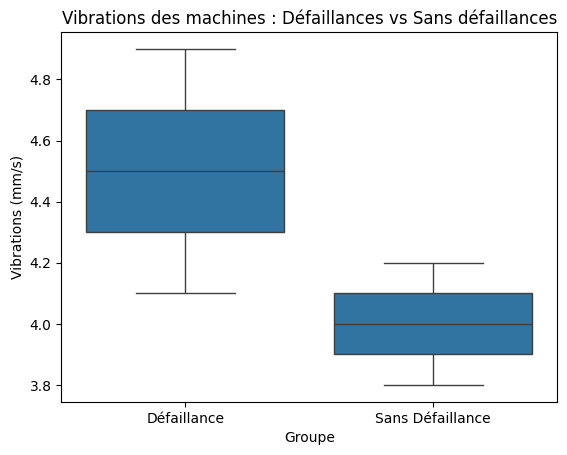

In [751]:
groupe1 = [4.2, 4.5, 4.1, 4.8, 4.6, 4.7, 4.3, 4.9, 4.4, 4.6, 4.8, 4.2, 4.7, 4.5, 4.3]
groupe2 = [3.9, 4.0, 4.1, 3.8, 4.0, 3.9, 4.1, 4.2, 3.8, 4.0, 4.1, 3.9, 4.0, 4.1, 3.8, 4.0, 4.1, 3.9, 4.0, 4.1]

data = {
    "Vibrations (mm/s)": groupe1 + groupe2,
    "Groupe": ["Défaillance"] * len(groupe1) + ["Sans Défaillance"] * len(groupe2)
}

df = pd.DataFrame(data)

sns.boxplot(data=df, x='Groupe', y='Vibrations (mm/s)')
plt.title("Vibrations des machines : Défaillances vs Sans défaillances")

In [752]:
print("H0 : Les moyennes des vibrations sont égales pour les machines avec et sans défaillance.\n")

alpha = 0.05

vibration_defaillance = groupe1
vibrations_sans_defaillance = groupe2

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(a=groupe1, b=groupe2)

if p_value < alpha:
    print("On rejete H0; la moyenne des vibrations des machines avec défaillance diffère significativement de celle des machines sans défaillance."
    "\n=> Les vibrations peut servir de signal précurseur dans la maintenance prédictive.")
else:
    print("Nous n'avons pas suffisamment d'évidences pour rejeter H0")


H0 : Les moyennes des vibrations sont égales pour les machines avec et sans défaillance.

On rejete H0; la moyenne des vibrations des machines avec défaillance diffère significativement de celle des machines sans défaillance.
=> Les vibrations peut servir de signal précurseur dans la maintenance prédictive.


# Test ANOVA (>= 3 échontillons indépendants)
**"Comparer les moyennes de 3 goupes ou plus pour déterminer s'il existe une différence statistiquement significative entre au moins deux d'entre d'eux"**

### Exo d'application en Maintenance prédictive
**Contexte :**
Dans le cadre de la maintenance prédictive, on souhaite étudier l'effet de trois types de stratégies de maintenance sur la température moyenne de fonctionnement d’un équipement critique.
On suppose que la température optimale est de 75°C et que les variations peuvent être liées au type de maintenance appliqué.

**Groupes de Données :**
- Groupe 1 (Maintenance prédictive A) :

Températures mesurées sur 10 équipements :
[74.8, 75.2, 75.0, 74.9, 75.1, 75.3, 74.7, 75.0, 75.1, 75.0]

- Groupe 2 (Maintenance prédictive B) :

Températures mesurées sur 10 équipements :
[75.5, 75.7, 75.6, 75.4, 75.8, 75.6, 75.7, 75.5, 75.6, 75.7]

- Groupe 3 (Maintenance standard) :

Températures mesurées sur 10 équipements :
[74.9, 75.0, 74.8, 74.7, 75.1, 74.9, 74.8, 75.0, 74.9, 75.0]

**Objectif :**
Tester l'hypothèse que la moyenne des températures est la même pour les trois stratégies de maintenance (H₀) contre l'hypothèse qu'au moins l'une diffère (H₁).

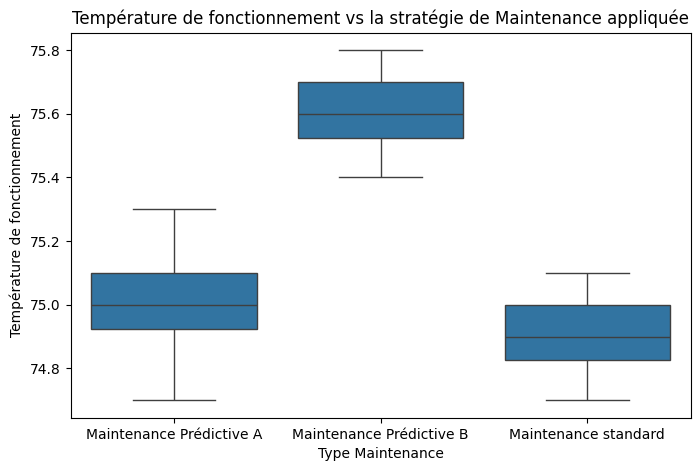

In [753]:
groupe1 = [74.8, 75.2, 75.0, 74.9, 75.1, 75.3, 74.7, 75.0, 75.1, 75.0]
groupe2 = [75.5, 75.7, 75.6, 75.4, 75.8, 75.6, 75.7, 75.5, 75.6, 75.7]
groupe3 = [74.9, 75.0, 74.8, 74.7, 75.1, 74.9, 74.8, 75.0, 74.9, 75.0]

data = {
    "Type Maintenance": ["Maintenance Prédictive A"] * len(groupe1) + ["Maintenance Prédictive B"] * len(groupe2) + ["Maintenance standard"] * len(groupe3),
    "Température de fonctionnement": groupe1 + groupe2 + groupe3 
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Type Maintenance', y='Température de fonctionnement')
plt.title("Température de fonctionnement vs la stratégie de Maintenance appliquée")
plt.show()

In [754]:
print('H0 : La Température moyenne de fonctionnement est la même pour les trois stratégies de maintenance appliquée.\n')

alpha = 0.05

df.groupby('Type Maintenance')['Température de fonctionnement'].apply(list)

from scipy.stats import f_oneway
t_stat, p_value = f_oneway(*df.groupby('Type Maintenance')['Température de fonctionnement'].apply(list))

if p_value < alpha:
    print("On rejet H0; le type de stratégie de maintenance a un impact sur la température de fonctionnement.")
else:
    print("Aucune différence significative n'a été détectée entre les groupes au niveau de température.")



H0 : La Température moyenne de fonctionnement est la même pour les trois stratégies de maintenance appliquée.

On rejet H0; le type de stratégie de maintenance a un impact sur la température de fonctionnement.


## Différence entre ttest_ind vs f_onway
| Test              | Nombre de groupes | Hypothèse testée                   | Sortie principale       |
|--------------------|-------------------|-------------------------------------|-------------------------|
| ttest_ind         | 2 groupes         | Différence entre 2 moyennes        | Stat t et p-value       |
| f_oneway (ANOVA)  | 3 groupes ou plus | Différence entre plusieurs moyennes| Stat F et p-value       |

# Test de Pearsonr (Variable continues)
**Quantifier la correlation entre deux variables continues**

### Exercice d'Application en Maintenance Prédictive
**Contexte :**
Dans un système de maintenance prédictive, on souhaite étudier la relation entre deux indicateurs :

- Niveau de vibration (en mm/s)
- Température de fonctionnement (en °C)

L'objectif est de déterminer s'il existe une corrélation linéaire entre l'augmentation des vibrations et l'élévation de la température, ce qui pourrait indiquer un comportement anormal des équipements.

H0 : Il n'exite pas une correlation linéaire entre la température et les vibrations de l'équipement
On rejet H0; la correlation entre Temp et Vibrations est statistiquement significative.


Text(0, 0.5, 'Vibrations (mm/s)')

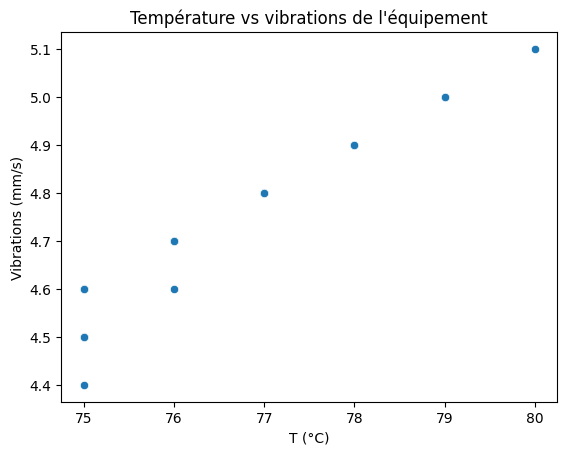

In [755]:
Vib =  [4.5, 4.7, 4.8, 4.4, 4.6, 4.9, 5.0, 4.7, 4.8, 4.6, 4.5, 4.9, 5.1, 4.8, 4.7, 4.6, 4.8, 4.9, 5.0, 4.7]
Temp = [75, 76, 77, 75, 76, 78, 79, 76, 77, 75, 75, 78, 80, 77, 76, 75, 77, 78, 79, 76]

print("H0 : Il n'exite pas une correlation linéaire entre la température et les vibrations de l'équipement")

from scipy.stats import pearsonr
r, p_value = pearsonr(Vib, Temp)

if p_value < alpha:
    print("On rejet H0; la correlation entre Temp et Vibrations est statistiquement significative.")
else:
    print("On ne peut pas conclure qu'il existe une correlation significative entre les deux indicateurs")

sns.scatterplot(x=Temp, y=Vib);
plt.title("Température vs vibrations de l'équipement")
plt.xlabel('T (°C)')
plt.ylabel("Vibrations (mm/s)")


# Encoding - OrdinalEncoding

In [756]:
from sklearn.preprocessing import OrdinalEncoder

In [757]:
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [758]:
df['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [759]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

encoder = OrdinalEncoder(
    categories=[cut_order, color_order, clarity_order],
    handle_unknown="use_encoded_value",
    unknown_value=-1,
    )
encoder.fit(df[['cut', 'color', 'clarity']])
encoder.transform(df[['cut', 'color', 'clarity']])

array([[4., 5., 1.],
       [3., 5., 2.],
       [1., 5., 4.],
       ...,
       [2., 6., 2.],
       [3., 2., 1.],
       [4., 6., 1.]], shape=(53940, 3))

Astuce : Ajouter les cotégories qui peuvent se présenter dans les données à venir !

# Encoding - OneHotEncoder

In [760]:
from sklearn.preprocessing import OneHotEncoder

In [761]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [762]:
encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')
encoder.fit(df[['origin', 'name']])
encoder.transform(df[['origin', 'name']])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(398, 306))

# Exercie Encoding

In [763]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [764]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [765]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
day = encoder.fit_transform(df[['sex', 'smoker', 'time', 'day']])
day

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [1., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], shape=(244, 6))

In [766]:
day_df = pd.DataFrame(day, columns=encoder.get_feature_names_out(['sex', 'smoker', 'time', 'day']), index=df.index)

day_df.head()


,sex_Male,smoker_Yes,time_Lunch,day_Sat,day_Sun,day_Thur
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [767]:
encoded_df =  pd.concat([df.drop(columns=['sex', 'smoker', 'time', 'day']), day_df], axis=1)
encoded_df

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2,0.0,0.0,0.0,0.0,1.0,0.0
1,10.34,1.66,3,1.0,0.0,0.0,0.0,1.0,0.0
2,21.01,3.50,3,1.0,0.0,0.0,0.0,1.0,0.0
3,23.68,3.31,2,1.0,0.0,0.0,0.0,1.0,0.0
4,24.59,3.61,4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1.0,0.0,0.0,1.0,0.0,0.0
240,27.18,2.00,2,0.0,1.0,0.0,1.0,0.0,0.0
241,22.67,2.00,2,1.0,1.0,0.0,1.0,0.0,0.0
242,17.82,1.75,2,1.0,0.0,0.0,1.0,0.0,0.0


## Dataset : Penguins

In [768]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [769]:
for col in penguins.select_dtypes(include='object').columns:
    print(f"{col} : {penguins[col].unique()}")

species : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Torgersen' 'Biscoe' 'Dream']
sex : ['Male' 'Female']


In [770]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
penguins1 = encoder.fit_transform(penguins[['island', 'sex']])


In [771]:
penguins1 = pd.DataFrame(penguins1, columns=encoder.get_feature_names_out(['island', 'sex']), index=penguins.index)
penguins1

,island_Dream,island_Torgersen,sex_Male
0,0.0,1.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,1.0
...,...,...,...
338,0.0,0.0,0.0
340,0.0,0.0,0.0
341,0.0,0.0,1.0
342,0.0,0.0,0.0


In [772]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
penguins2 = encoder.fit_transform(penguins['species'])

penguins2 = pd.DataFrame(penguins2, columns=encoder.classes_, index=penguins.index)
penguins2

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
338,0,0,1
340,0,0,1
341,0,0,1
342,0,0,1


In [773]:
penguins_encoded = pd.concat([penguins.drop(columns=['species', 'island', 'sex']), penguins1, penguins2], axis=1)
penguins_encoded

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male,Adelie,Chinstrap,Gentoo
0,39.1,18.7,181.0,3750.0,0.0,1.0,1.0,1,0,0
1,39.5,17.4,186.0,3800.0,0.0,1.0,0.0,1,0,0
2,40.3,18.0,195.0,3250.0,0.0,1.0,0.0,1,0,0
4,36.7,19.3,193.0,3450.0,0.0,1.0,0.0,1,0,0
5,39.3,20.6,190.0,3650.0,0.0,1.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0.0,0.0,0.0,0,0,1
340,46.8,14.3,215.0,4850.0,0.0,0.0,0.0,0,0,1
341,50.4,15.7,222.0,5750.0,0.0,0.0,1.0,0,0,1
342,45.2,14.8,212.0,5200.0,0.0,0.0,0.0,0,0,1


In [774]:
penguins['species']

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [775]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
penguins3 = encoder.fit_transform(penguins['species'])
penguins3


penguins3 = pd.DataFrame(penguins3, columns=['species'], index=penguins.index)
penguins3


,species
0,0
1,0
2,0
4,0
5,0
...,...
338,2
340,2
341,2
342,2


In [776]:
penguins_encoded = pd.concat([penguins.drop(columns=['species', 'island', 'sex']), penguins1, penguins3], axis=1)
penguins_encoded

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male,species
0,39.1,18.7,181.0,3750.0,0.0,1.0,1.0,0
1,39.5,17.4,186.0,3800.0,0.0,1.0,0.0,0
2,40.3,18.0,195.0,3250.0,0.0,1.0,0.0,0
4,36.7,19.3,193.0,3450.0,0.0,1.0,0.0,0
5,39.3,20.6,190.0,3650.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0.0,0.0,0.0,2
340,46.8,14.3,215.0,4850.0,0.0,0.0,0.0,2
341,50.4,15.7,222.0,5750.0,0.0,0.0,1.0,2
342,45.2,14.8,212.0,5200.0,0.0,0.0,0.0,2


## DataSet : Flights

In [777]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [778]:
df['month'].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [779]:
for cat in df['month'].unique():
    print(cat)

Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec


In [780]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
encoder = OrdinalEncoder(categories=[month_order])
df['encoded_month'] = encoder.fit_transform(df[['month']])


In [781]:
df = df.drop('month', axis=1)
df

,year,passengers,encoded_month
0,1949,112,0.0
1,1949,118,1.0
2,1949,132,2.0
3,1949,129,3.0
4,1949,121,4.0
...,...,...,...
139,1960,606,7.0
140,1960,508,8.0
141,1960,461,9.0
142,1960,390,10.0


- Les mois de l'année peuvent généralement être manipulés sous forme Ordinale.
- Un Encodage OneHot peut également convenir, mais cela rajoute 12 colonnes dans notre jeu de données, ce qui donne plus de chance d'Overfitting à notre modèle, et donne de moins bonnes performances.

## DataSet : Exercise

In [782]:
df = sns.load_dataset('exercise')
df.set_index("Unnamed: 0", inplace=True)
df

,id,diet,pulse,time,kind
Unnamed: 0,,,,,
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running


-  Varaibles nominales : diet, kind
- Variables ordinales : time

In [783]:
df.nunique()

id       30
diet      2
pulse    39
time      3
kind      3
dtype: int64

In [784]:
df['kind'].unique()

['rest', 'walking', 'running']
Categories (3, object): ['rest', 'walking', 'running']

In [785]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(df[['diet', 'kind']])

df1 = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['diet', 'kind']), index=df.index)
df1.head()

,diet_no fat,kind_running,kind_walking
Unnamed: 0,,,
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


- Concenant la variable "time", on va lui appliquer une fonction de netoyage

In [786]:
# Mathode 1
#df['time'] = df['time'].apply(lambda x: 1.0 if x=='1 min' else 15.0 if x=='15 min' else 30.0)

# Méthode 2
df['time'] = df['time'].cat.rename_categories({'1 min': 1, '15 min': 15, '30 min': 30})

In [787]:
df.head()

,id,diet,pulse,time,kind
Unnamed: 0,,,,,
0,1,low fat,85,1,rest
1,1,low fat,85,15,rest
2,1,low fat,88,30,rest
3,2,low fat,90,1,rest
4,2,low fat,92,15,rest


In [788]:
df_encoded = pd.concat([df.drop(columns=['diet', 'kind']), df1], axis=1)
df_encoded

,id,pulse,time,diet_no fat,kind_running,kind_walking
Unnamed: 0,,,,,,
0,1,85,1,0.0,0.0,0.0
1,1,85,15,0.0,0.0,0.0
2,1,88,30,0.0,0.0,0.0
3,2,90,1,0.0,0.0,0.0
4,2,92,15,0.0,0.0,0.0
...,...,...,...,...,...,...
85,29,135,15,1.0,1.0,0.0
86,29,130,30,1.0,1.0,0.0
87,30,99,1,1.0,1.0,0.0


- Remarque : la variable "kind" peut aussi être considérer comme une variable ordinale --> Il faut tester les deux encodages vis-à-vis de la meilleure performance !

## DataSet : taxis

In [789]:
taxis = sns.load_dataset('taxis')
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


- **Variables Nominales :** color, payment, pickup_zone, dropoff_zone, pickup_borough, dropoff_borough
- **Variables Ordinales :** 

In [790]:
taxis.select_dtypes(include='object').nunique()

color                2
payment              2
pickup_zone        194
dropoff_zone       203
pickup_borough       4
dropoff_borough      5
dtype: int64

In [791]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit_transform(taxis[['color', 'payment', 'pickup_borough', 'dropoff_borough', 'pickup_zone', 'dropoff_zone']])

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(6433, 409))

Le très grand nombre de catégories dans pickup_zone et dropoff_zone risque de donner une matrice creuse qui engendrera un overfitting, une gros poids sur la RAM, et d'autres inconvénient. Dans la pratique, il convient d'utiliser d'autres techniques :
  - Target Encoding,
  - Un Encodage GPS pourrait également être judicieux,
  - Un feature-engeneering consistant a regrouper les zones en clusters / proximité, banlieu pourrait être judicieux

  Tester toutes les techniques, et grader celle qui donne les meilleures performances 

# Normalisation

In [792]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [793]:
df_numeric = df.select_dtypes(include=['int', 'float'])
df_numeric.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Normalisation MinMax

- Convient pour la plupart des distributions
- à éviter pour les valeurs abérrantes

In [794]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

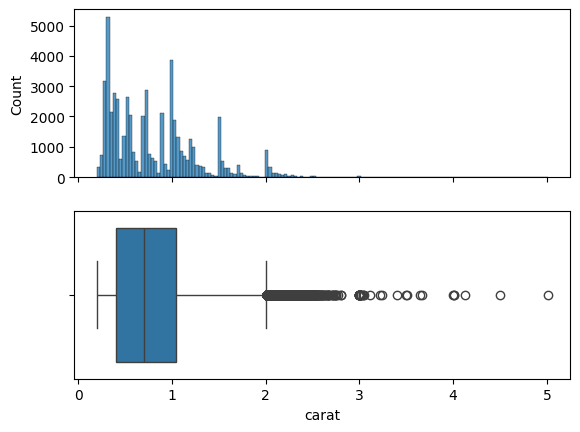

In [795]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x='carat', ax=ax[0])
sns.boxplot(data=df, x='carat', ax=ax[1])
plt.show()

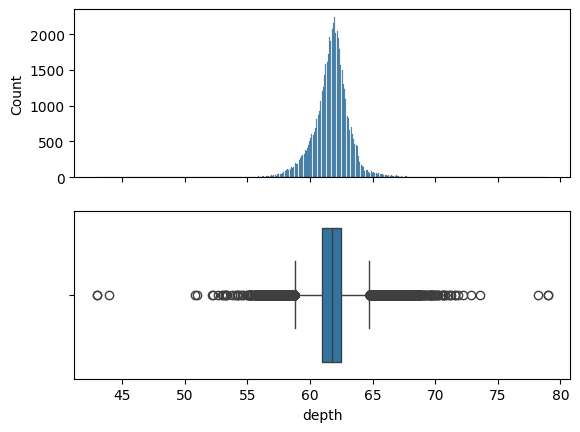

In [796]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x='depth', ax=ax[0])
sns.boxplot(data=df, x='depth', ax=ax[1])
plt.show()

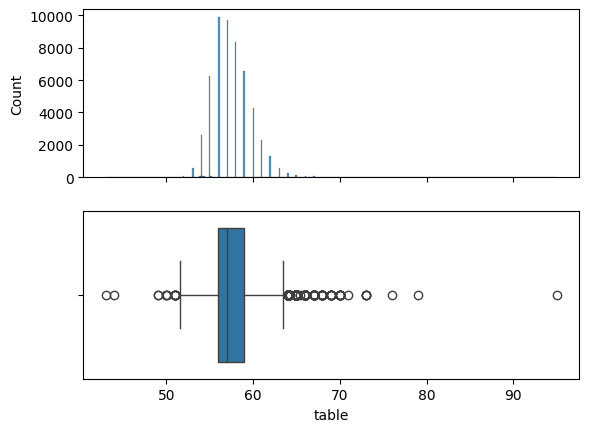

In [797]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x='table', ax=ax[0])
sns.boxplot(data=df, x='table', ax=ax[1])
plt.show()

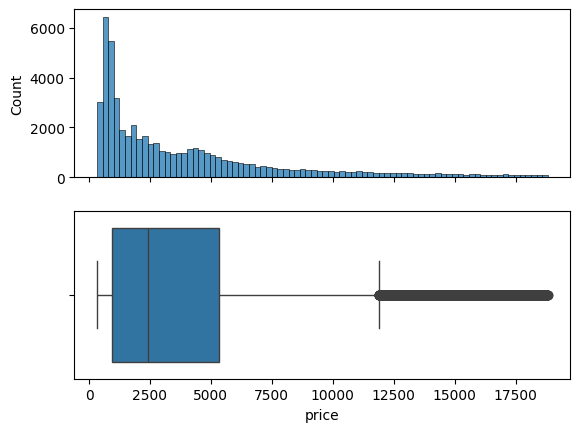

In [798]:
fig, ax = plt.subplots(2, 1, sharex=True)
sns.histplot(data=df, x='price', ax=ax[0])
sns.boxplot(data=df, x='price', ax=ax[1])
plt.show()

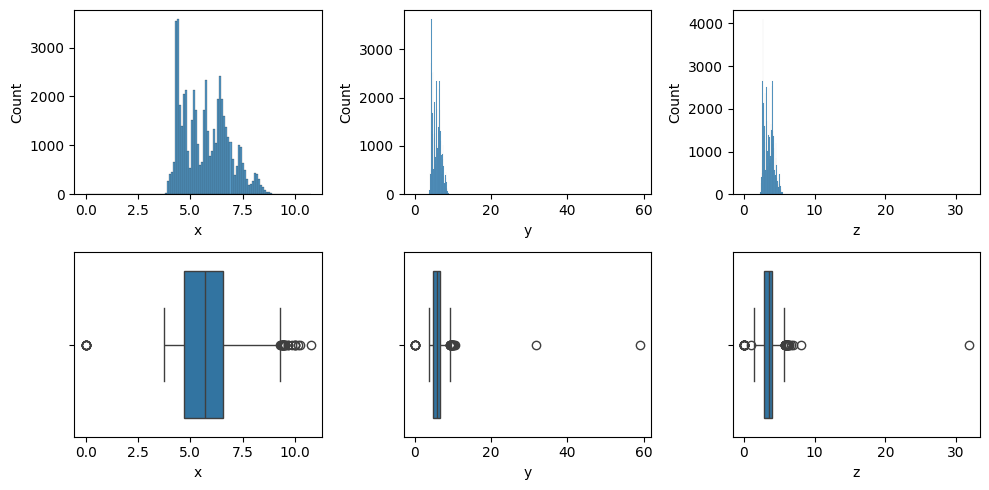

In [799]:
fig, ax = plt.subplots(2, 3, figsize=(10, 5))
sns.histplot(data=df, x='x', ax=ax[0, 0])
sns.boxplot(data=df, x='x', ax=ax[1, 0])

sns.histplot(data=df, x='y', ax=ax[0, 1])
sns.boxplot(data=df, x='y', ax=ax[1, 1])

sns.histplot(data=df, x='z', ax=ax[0, 2])
sns.boxplot(data=df, x='z', ax=ax[1, 2])

plt.tight_layout()
plt.show()

In [800]:
df_numeric

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [801]:
scaler = MinMaxScaler()

scaler.fit(df_numeric)

df_minmax = pd.DataFrame(scaler.transform(df_numeric), columns=df_numeric.columns)

In [802]:
df_minmax.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.124312,0.520817,0.278023,0.194994,0.533627,0.097360,0.111281
std,0.098547,0.039795,0.042971,0.215680,0.104447,0.019391,0.022192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.500000,0.250000,0.033735,0.438547,0.080136,0.091509
50%,0.103950,0.522222,0.269231,0.112180,0.530726,0.096944,0.111006
75%,0.174636,0.541667,0.307692,0.270219,0.608939,0.111036,0.127044
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='z', ylabel='Count'>

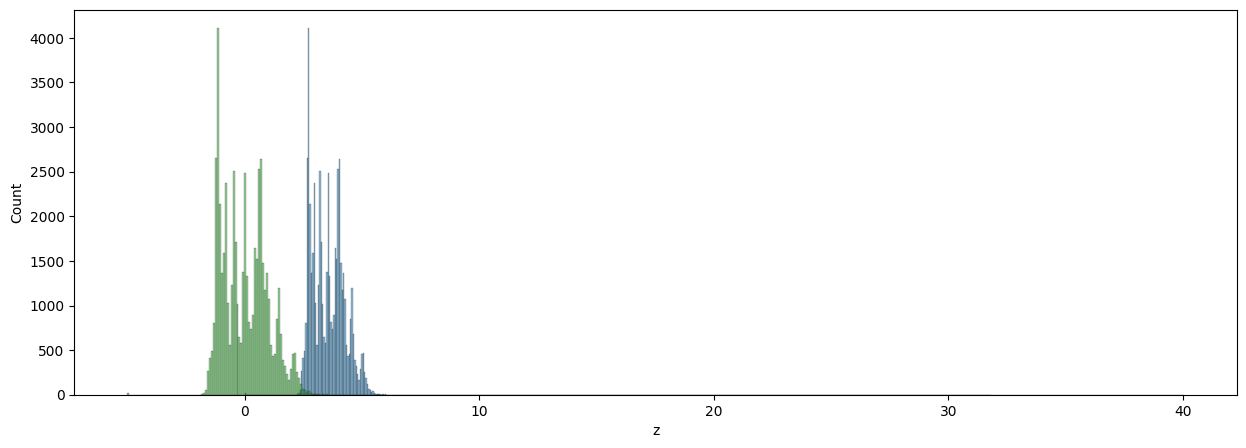

In [803]:
variable='z'
plt.figure(figsize=(15, 5))
sns.histplot(data=df_numeric, x=variable, color='tab:blue', alpha=0.5)
#sns.histplot(data=df_minmax, x=variable, color='tab:orange', alpha=0.5)
sns.histplot(data=df_standard, x=variable, color='tab:green', alpha=0.5)

# Standarisation
- Donne de bons résultats aux variables suivant une allure Gaussienne

In [804]:
scaler = StandardScaler()

scaler.fit(df_numeric)

df_standard = pd.DataFrame(scaler.transform(df_numeric), columns=df_numeric.columns)

In [805]:
df_standard.describe()

,carat,depth,table,price,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.444878e-16,-3.996902e-15,9.695207e-17,-9.273676e-17,2.782103e-16,-8.430615e-17,-2.002271e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458e+00,-1.308760e+01,-6.470073e+00,-9.040952e-01,-5.109120e+00,-5.020931e+00,-5.014556e+00
25%,-8.395232e-01,-5.231053e-01,-6.521385e-01,-7.476808e-01,-9.103248e-01,-8.882800e-01,-8.909461e-01
50%,-2.066210e-01,3.531678e-02,-2.046051e-01,-3.839672e-01,-2.777553e-02,-2.147398e-02,-1.237618e-02
75%,5.106683e-01,5.239361e-01,6.904618e-01,3.487866e-01,7.210542e-01,7.052421e-01,7.103184e-01
max,8.886075e+00,1.204139e+01,1.680167e+01,3.732438e+00,4.465203e+00,4.654965e+01,4.004758e+01


<Axes: xlabel='carat'>

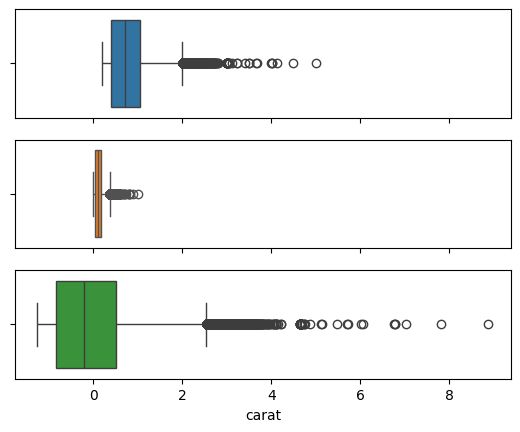

In [806]:
fig, ax = plt.subplots(3, 1, sharex=True)
sns.boxplot(data=df_numeric, x='carat', color='tab:blue', ax=ax[0])
sns.boxplot(data=df_minmax, x='carat', color='tab:orange', ax=ax[1])
sns.boxplot(data=df_standard, x='carat', color='tab:green', ax=ax[2])

# Feature Engineering

In [821]:
from sklearn.preprocessing import PolynomialFeatures

df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


1. Créez une variable volume

In [828]:
polynomial_transform = PolynomialFeatures(degree=3,interaction_only=True,include_bias=False)
polynomial_transform.fit_transform(df[['x', 'y', 'z']])[:]

array([[  3.95    ,   3.98    ,   2.43    , ...,   9.5985  ,   9.6714  ,
         38.20203 ],
       [  3.89    ,   3.84    ,   2.31    , ...,   8.9859  ,   8.8704  ,
         34.505856],
       [  4.05    ,   4.07    ,   2.31    , ...,   9.3555  ,   9.4017  ,
         38.076885],
       ...,
       [  5.66    ,   5.68    ,   3.56    , ...,  20.1496  ,  20.2208  ,
        114.449728],
       [  6.15    ,   6.12    ,   3.74    , ...,  23.001   ,  22.8888  ,
        140.76612 ],
       [  5.83    ,   5.87    ,   3.64    , ...,  21.2212  ,  21.3668  ,
        124.568444]], shape=(53940, 7))

In [808]:
df['volume'] = df['x'] * df['y'] * df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


2. Créez une variable qui donne le Rapport carat / volume. En effet Il pourrait être utile de créer une variable qui montre la densité apparente du diamant en comparant le poids (carat) au volume (volume). Les diamants avec une densité apparente élevée pourraient indiquer des caractéristiques spécifiques qui influencent le prix.

In [809]:
df['density'] = df['carat'] / df['volume']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.006021
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.006086
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.006040
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.006207
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.005971


3. Determinez la corrélation entre ces nouvelles variables et le prix. Ces nouvelles associations sont-elles intéressantes ?

In [810]:
df.select_dtypes(exclude='category').corr()['price'].sort_values()

depth     -0.010647
table      0.127134
density    0.143440
z          0.861249
y          0.865421
x          0.884435
volume     0.902385
carat      0.921591
price      1.000000
Name: price, dtype: float64

- La variable *volume* présente une forte corrélation avec le prix du diamont. Cette association est particulièrement intéressante. En revanche, celle avec la densité semble moins significative.

4. La variable Depth est elle-meme construite sur la base des variables x, y, et z. Saurez-vous trouver laquelle ?

In [811]:
df['z/[(x+y)/2]%'] = (df['z'] / ((df['y'] + df['x'])/2)* 100).round(1)

In [812]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density,z/[(x+y)/2]%
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.006021,61.3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.006086,59.8
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.006040,56.9
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.006207,62.4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.005971,63.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000,0.006211,60.8
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175,0.006096,63.1
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728,0.006116,62.8
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120,0.006109,61.0


5. Avez-vous d'autres idées de Feature Engineering?

In [813]:
df['surface'] = df['x'] * df['y']

In [814]:
df.select_dtypes(exclude='category').corr()['price'].sort_values()

z/[(x+y)/2]%   -0.012702
depth          -0.010647
table           0.127134
density         0.143440
z               0.861249
y               0.865421
x               0.884435
surface         0.901152
volume          0.902385
carat           0.921591
price           1.000000
Name: price, dtype: float64

6. Utilisez polynomial features pour tester des combinaisons de degré 2 et dites s'il existe des variables intéressantes.

In [815]:
from sklearn.preprocessing import PolynomialFeatures

In [816]:
polynomial_tranform = PolynomialFeatures(interaction_only=False)

polynomial_df = polynomial_tranform.fit_transform((df[['carat', 'x', 'y', 'z']]))

In [817]:
polynomial_df = pd.DataFrame(polynomial_df, columns=polynomial_tranform.get_feature_names_out(['carat', 'x', 'y', 'z']))
polynomial_df.head()

,1,carat,x,y,z,carat^2,carat x,carat y,carat z,x^2,x y,x z,y^2,y z,z^2
0,1.0,0.23,3.95,3.98,2.43,0.0529,0.9085,0.9154,0.5589,15.6025,15.7210,9.5985,15.8404,9.6714,5.9049
1,1.0,0.21,3.89,3.84,2.31,0.0441,0.8169,0.8064,0.4851,15.1321,14.9376,8.9859,14.7456,8.8704,5.3361
2,1.0,0.23,4.05,4.07,2.31,0.0529,0.9315,0.9361,0.5313,16.4025,16.4835,9.3555,16.5649,9.4017,5.3361
3,1.0,0.29,4.20,4.23,2.63,0.0841,1.2180,1.2267,0.7627,17.6400,17.7660,11.0460,17.8929,11.1249,6.9169
4,1.0,0.31,4.34,4.35,2.75,0.0961,1.3454,1.3485,0.8525,18.8356,18.8790,11.9350,18.9225,11.9625,7.5625


In [818]:
df = pd.concat([df.drop(['carat', 'x', 'y', 'z'], axis=1), polynomial_df], axis=1)
df.head()

,cut,color,clarity,depth,table,price,volume,density,z/[(x+y)/2]%,surface,...,carat^2,carat x,carat y,carat z,x^2,x y,x z,y^2,y z,z^2
0,Ideal,E,SI2,61.5,55.0,326,38.202030,0.006021,61.3,15.7210,...,0.0529,0.9085,0.9154,0.5589,15.6025,15.7210,9.5985,15.8404,9.6714,5.9049
1,Premium,E,SI1,59.8,61.0,326,34.505856,0.006086,59.8,14.9376,...,0.0441,0.8169,0.8064,0.4851,15.1321,14.9376,8.9859,14.7456,8.8704,5.3361
2,Good,E,VS1,56.9,65.0,327,38.076885,0.006040,56.9,16.4835,...,0.0529,0.9315,0.9361,0.5313,16.4025,16.4835,9.3555,16.5649,9.4017,5.3361
3,Premium,I,VS2,62.4,58.0,334,46.724580,0.006207,62.4,17.7660,...,0.0841,1.2180,1.2267,0.7627,17.6400,17.7660,11.0460,17.8929,11.1249,6.9169
4,Good,J,SI2,63.3,58.0,335,51.917250,0.005971,63.3,18.8790,...,0.0961,1.3454,1.3485,0.8525,18.8356,18.8790,11.9350,18.9225,11.9625,7.5625


In [820]:
df.select_dtypes(exclude='category').corr()['price'].sort_values()

z/[(x+y)/2]%   -0.012702
depth          -0.010647
table           0.127134
density         0.143440
y^2             0.601827
z^2             0.688294
z               0.861249
y               0.865421
y z             0.879858
x               0.884435
carat^2         0.890938
surface         0.901152
x y             0.901152
volume          0.902385
x z             0.903501
x^2             0.908568
carat y         0.918695
carat z         0.919969
carat           0.921591
carat x         0.923270
price           1.000000
1                    NaN
Name: price, dtype: float64

In [ ]:
g